In [1]:
!pip install gprofiler-official pandas seaborn matplotlib

In [2]:
import pandas as pd
import requests
import networkx as nx
import matplotlib.pyplot as plt
import glob
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import seaborn as sns
from matplotlib_venn import venn3
from gprofiler import GProfiler
from google.colab import files
import os
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [3]:
uploaded = files.upload()

Saving Downregulated_DEGs.csv to Downregulated_DEGs.csv


In [4]:
filtered_genes = pd.read_csv("Downregulated_DEGs.csv")

In [5]:
filtered_genes

,Gene,log2FC,p-value,adj_p-value
0,TUBB,-1.689177,0.000362,0.004818
1,LPP,-1.776559,0.000922,0.009398
2,UGP2,-1.259684,0.004785,0.031507
3,MFN2,-1.370978,0.004161,0.028236
4,HIST1H2BD,-1.058805,0.006919,0.041134
...,...,...,...,...
902,AQP1.1,-1.721401,0.001532,0.013495
903,LCAT,-1.046725,0.006416,0.039011
904,HMGCS2,-1.546631,0.002415,0.018915
905,CCDC68,-1.442749,0.000049,0.001305


In [6]:
filtered_genes.columns

Index(['Gene', 'log2FC', 'p-value', 'adj_p-value'], dtype='object')

In [7]:
df_filtered = filtered_genes.drop(columns=['log2FC', 'p-value', 'adj_p-value'])

In [8]:
gcna_filtered_genes = df_filtered['Gene'].tolist()

In [9]:
len(gcna_filtered_genes)

907

In [10]:
gcna_filtered_genes

['TUBB',
 'LPP',
 'UGP2',
 'MFN2',
 'HIST1H2BD',
 'SEMA3E',
 'RGS5',
 'MGP',
 'TP53I3',
 'KCNMB1',
 'SECTM1',
 'CA1',
 'MTMR9',
 'IL10RA',
 'LRRC17',
 'SLC15A1',
 'PLAC8',
 'SLC30A4',
 'SNCG',
 'CLEC10A',
 'GCNT2',
 'SLC22A17',
 'EFEMP2',
 'DMD',
 'SOX10',
 'CACNB2',
 'POU2F2',
 'MPP2',
 'ADCY9',
 'RGL1',
 'ATP6V1G2',
 'IL1R2',
 'SCARA3',
 'CASZ1',
 'ROR1',
 'RGS1',
 'METTL7A',
 'SPOCK2',
 'GFRA2',
 'BNC2',
 'PPP2R3A',
 'MYOT',
 'TRPC6',
 'CDKN2C.1',
 'ANK3.1',
 'MEOX1',
 'C1QA',
 'CBX7',
 'MT1M',
 'TSPYL2',
 'ZFHX4',
 'CCDC69',
 'MGLL',
 'CFH',
 'CRABP1',
 'CYR61',
 'CD37',
 'CRTAC1',
 'DTX3',
 'ST6GALNAC2',
 'CAV2',
 'SLC1A1',
 'HLA-DOA',
 'PDE8B',
 'ACVRL1',
 'MEP1A',
 'CEACAM7',
 'MYH11',
 'MMRN1',
 'ACAA2',
 'POPDC2',
 'ITGA8',
 'SGK2',
 'BTNL3',
 'BMP5',
 'PPP2R2B',
 'WFDC1',
 'VCL',
 'NR3C2',
 'CTF1',
 'ANK3.2',
 'BTK',
 'LARGE',
 'COX7A1',
 'CA2',
 'PDLIM4',
 'HIF3A',
 'CITED2',
 'ADAMTS8',
 'ITIH5',
 'SORBS1',
 'SLC24A3',
 'MTUS1',
 'DNAJB5',
 'CNNM2',
 'FBLN5',
 'ADAM28',
 'C

In [11]:
df = pd.DataFrame({"Genes": gcna_filtered_genes})

In [12]:
df

,Genes
0,TUBB
1,LPP
2,UGP2
3,MFN2
4,HIST1H2BD
...,...
902,AQP1.1
903,LCAT
904,HMGCS2
905,CCDC68


In [13]:
gp = GProfiler(return_dataframe=True)
gene_list = gcna_filtered_genes

In [14]:
reac_results = gp.profile(organism='hsapiens', query=gene_list, sources=["REAC"])

print(reac_results.head())

  source              native                               name       p_value  \
0   REAC   REAC:R-HSA-397014                 Muscle contraction  9.557658e-08   
1   REAC   REAC:R-HSA-109582                         Hemostasis  5.067983e-05   
2   REAC  REAC:R-HSA-5660526             Response to metal ions  5.432697e-05   
3   REAC  REAC:R-HSA-5661231       Metallothioneins bind metals  1.297489e-04   
4   REAC  REAC:R-HSA-1474244  Extracellular matrix organization  2.507652e-04   

   significant                        description  term_size  query_size  \
0         True                 Muscle contraction        203         563   
1         True                         Hemostasis        675         563   
2         True             Response to metal ions         14         563   
3         True       Metallothioneins bind metals         11         563   
4         True  Extracellular matrix organization        298         563   

   intersection_size  effective_domain_size  precision  

In [15]:
reac_results.shape

(17, 14)

In [16]:
kegg_results = gp.profile(organism='hsapiens', query=gene_list, sources=["KEGG"])

print(kegg_results.head())

  source      native                        name   p_value  significant  \
0   KEGG  KEGG:04510              Focal adhesion  0.000014         True   
1   KEGG  KEGG:04022  cGMP-PKG signaling pathway  0.000017         True   
2   KEGG  KEGG:04978          Mineral absorption  0.000105         True   
3   KEGG  KEGG:04020   Calcium signaling pathway  0.000239         True   
4   KEGG  KEGG:05414      Dilated cardiomyopathy  0.000476         True   

                  description  term_size  query_size  intersection_size  \
0              Focal adhesion        202         485                 32   
1  cGMP-PKG signaling pathway        164         485                 28   
2          Mineral absorption         60         485                 15   
3   Calcium signaling pathway        251         485                 34   
4      Dilated cardiomyopathy        102         485                 19   

   effective_domain_size  precision    recall    query       parents  
0                   8484   

In [17]:
kegg_results.shape

(18, 14)

In [18]:
kegg_results.columns

Index(['source', 'native', 'name', 'p_value', 'significant', 'description',
       'term_size', 'query_size', 'intersection_size', 'effective_domain_size',
       'precision', 'recall', 'query', 'parents'],
      dtype='object')

In [19]:
total_genes= len(gcna_filtered_genes)
print("Total Downregulated genes: ",total_genes)

Total Downregulated genes:  907


In [20]:
def process_go_category(source, enrichment_results):
    df = enrichment_results[enrichment_results['source'] == source][["source","native","name", "intersection_size", "p_value"]].head(10)
    df["%"] = (df["intersection_size"] / total_genes)
    #df["p_value"] = df["p_value"].apply(lambda x: f"{x:.50f}")

    df = df[["source", "native","name", "%", "p_value"]]  # Keep only required columns
    df.columns = ["Category", "ID", "Term", "%", "p-value"]
    return df

In [21]:
reac_terms = process_go_category('REAC', reac_results)
kegg_terms = process_go_category('KEGG', kegg_results)

In [ ]:
reac_terms

,Category,ID,Term,%,p-value
0,REAC,REAC:R-HSA-397014,Muscle contraction,0.038589,1.147562e-07
1,REAC,REAC:R-HSA-5660526,Response to metal ions,0.008820,5.601341e-05
2,REAC,REAC:R-HSA-109582,Hemostasis,0.073870,5.911806e-05
3,REAC,REAC:R-HSA-5661231,Metallothioneins bind metals,0.007718,1.328093e-04
4,REAC,REAC:R-HSA-1474244,Extracellular matrix organization,0.040794,2.947734e-04
5,REAC,REAC:R-HSA-388396,GPCR downstream signalling,0.067255,4.073701e-04
6,REAC,REAC:R-HSA-372790,Signaling by GPCR,0.071665,9.120450e-04
7,REAC,REAC:R-HSA-162582,Signal Transduction,0.196251,1.266231e-03
8,REAC,REAC:R-HSA-5578775,Ion homeostasis,0.014333,1.288654e-03
9,REAC,REAC:R-HSA-76002,"Platelet activation, signaling and aggregation",0.035281,1.921253e-03


In [22]:
kegg_terms

,Category,ID,Term,%,p-value
0,KEGG,KEGG:04510,Focal adhesion,0.035281,0.000014
1,KEGG,KEGG:04022,cGMP-PKG signaling pathway,0.030871,0.000017
2,KEGG,KEGG:04978,Mineral absorption,0.016538,0.000105
3,KEGG,KEGG:04020,Calcium signaling pathway,0.037486,0.000239
4,KEGG,KEGG:05414,Dilated cardiomyopathy,0.020948,0.000476
5,KEGG,KEGG:04925,Aldosterone synthesis and secretion,0.019846,0.001047
6,KEGG,KEGG:04024,cAMP signaling pathway,0.031974,0.002997
7,KEGG,KEGG:04270,Vascular smooth muscle contraction,0.022051,0.007166
8,KEGG,KEGG:05412,Arrhythmogenic right ventricular cardiomyopathy,0.016538,0.008190
9,KEGG,KEGG:05144,Malaria,0.012128,0.008934


In [23]:
reac_terms.to_csv("Down_Top10_REAC.csv", index=False)
kegg_terms.to_csv("Down_Top10_KEGG.csv", index=False)

In [ ]:
files.download("Down_Top10_REAC.csv")
files.download("Down_Top10_KEGG.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
top10 = pd.concat([reac_terms, kegg_terms])
top10['Category'] = top10['Category']
top10.to_csv("Down_Top10_REAC_KEGG_All.csv", index=False)

print(top10)

  Category                  ID  \
0     REAC   REAC:R-HSA-397014   
1     REAC   REAC:R-HSA-109582   
2     REAC  REAC:R-HSA-5660526   
3     REAC  REAC:R-HSA-5661231   
4     REAC  REAC:R-HSA-1474244   
5     REAC   REAC:R-HSA-388396   
6     REAC   REAC:R-HSA-372790   
7     REAC  REAC:R-HSA-5578775   
8     REAC   REAC:R-HSA-162582   
9     REAC    REAC:R-HSA-76002   
0     KEGG          KEGG:04510   
1     KEGG          KEGG:04022   
2     KEGG          KEGG:04978   
3     KEGG          KEGG:04020   
4     KEGG          KEGG:05414   
5     KEGG          KEGG:04925   
6     KEGG          KEGG:04024   
7     KEGG          KEGG:04270   
8     KEGG          KEGG:05412   
9     KEGG          KEGG:05144   

                                              Term         %       p-value  
0                               Muscle contraction  0.038589  9.557658e-08  
1                                       Hemostasis  0.073870  5.067983e-05  
2                           Response to metal ions  0.

In [ ]:
files.download("Down_Top10_REAC_KEGG_All.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Bar Plot with % and -log10(p-value) as Color

In [25]:
top10_reac = reac_terms.nlargest(10, 'p-value')
top10_kegg = kegg_terms.nlargest(10, 'p-value')

### Function to create bar plot

In [26]:
def plot_go_terms(data, category, color_palette,save_path):

    fig, ax = plt.subplots(figsize=(12, 5))
    #data = data.sort_values("p-value", ascending=True)  # Highest p-value at top, lowest at bottom


    # Normalize p-values for color mapping
    norm = mcolors.LogNorm(vmin=data["p-value"].min(), vmax=data["p-value"].max())
    cmap = plt.get_cmap(color_palette)
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    sns.barplot(
        data=data,
        x="p-value",
        y="Term",
        hue="Term",
        dodge=False,
        palette=color_palette,
        legend=False,
        ax=ax
    )
    #data = data.sort_values("p-value", ascending=False)  # Highest p-value at top, lowest at bottom

    ax.set_xlabel("P-value (Lower is better)", fontsize=12)
    ax.set_xscale('log')
    ax.set_ylabel("Terms", fontsize=12)
    ax.set_title(f"Top 10 {category} Terms for downregulated DEGs", fontsize=14)

    min_p = data["p-value"].min()
    max_p = data["p-value"].max()
    ax.set_xlim(min_p * 0.8, max_p * 1.2)
    ax.invert_yaxis()

    # Add color bar
    cbar = fig.colorbar(sm, ax=ax, orientation="vertical")
    cbar.set_label("P-value Scale")

    if save_path is None:
        save_path = f"terms_{category}.png"

    plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()
    print(f"Plot saved as {save_path}")

### Plot BP, MF, and CC separately

Plot for top 10 BP

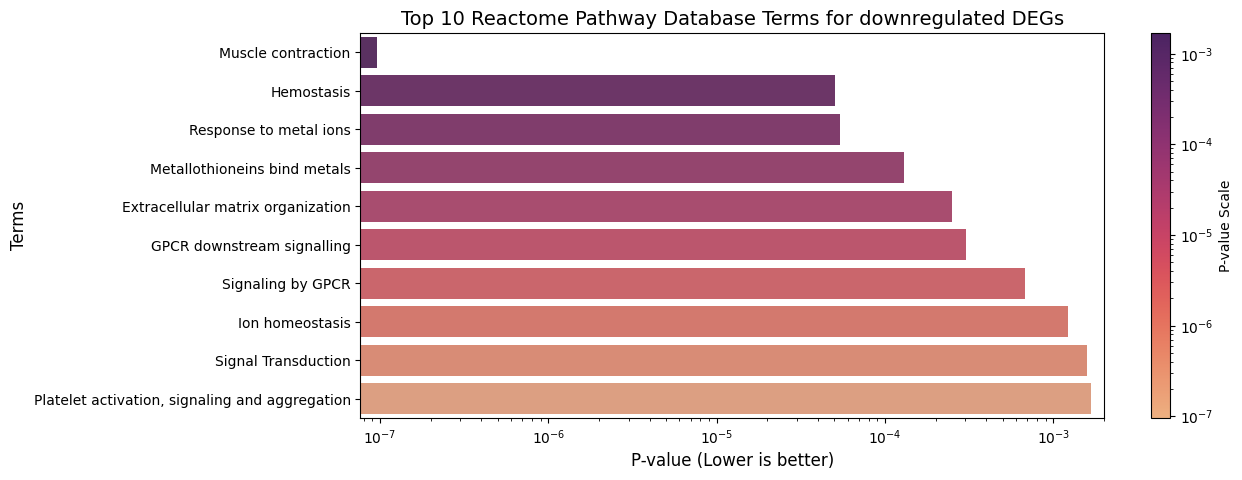

Plot saved as Down_REAC_10.png


In [27]:
plot_go_terms(top10_reac, 'Reactome Pathway Database', 'flare',save_path="Down_REAC_10.png")

Plot for top 10 MF

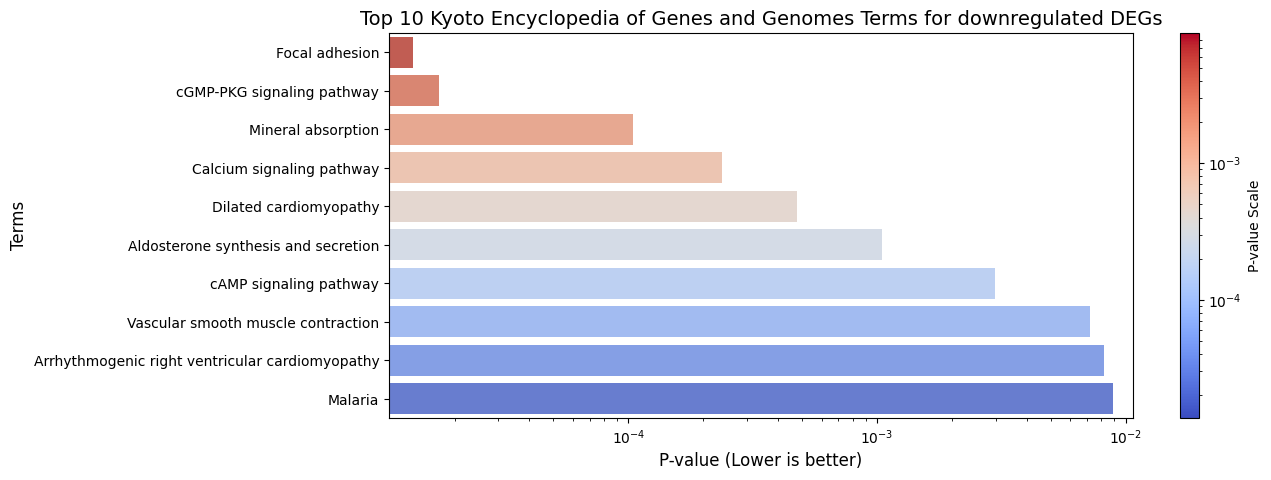

Plot saved as Down_KEGG_10.png


In [28]:
plot_go_terms(top10_kegg, 'Kyoto Encyclopedia of Genes and Genomes', 'coolwarm',save_path="Down_KEGG_10.png")

Plot for top 10 CC

In [29]:
files.download("Down_REAC_10.png")
files.download("Down_KEGG_10.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>